This data set comes from a bike sharing service in US. This data set requires you to exercise your pro data munging skills. The data set is provided quarter wise from 2010 (Q4) onwards. Each file has 7 columns. It is a classification problem.

Duration – Duration of trip
Start Date – Includes start date and time
End Date – Includes end date and time
Start Station – Includes starting station name and number
End Station – Includes ending station name and number
Bike Number – Includes ID number of bike used for the trip
Member Type – Indicates whether user was a "registered" member (Annual Member, 30-Day Member or Day Key Member) or a "casual" rider (Single Trip, 24-Hour Pass, 3-Day Pass or 5-Day Pass)

In [1]:
# road map 
# 

In [2]:
# import packages and data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('D:\\2017-Q1-cabi-trips-history-data\\2017-Q1-Trips-History-Data.csv',parse_dates=['Start date','End date'],infer_datetime_format=True)

In [5]:
data.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type
0,1048876,2017-03-31 23:59:00,2017-04-01 00:17:00,31213,17th & K St NW,31606,Potomac & Pennsylvania Ave SE,W20784,Registered
1,223449,2017-03-31 23:59:00,2017-04-01 00:03:00,31104,Adams Mill & Columbia Rd NW,31103,16th & Harvard St NW,W20825,Registered
2,423494,2017-03-31 23:58:00,2017-04-01 00:05:00,31627,M St & Delaware Ave NE,31614,11th & H St NE,W20773,Registered
3,687015,2017-03-31 23:57:00,2017-04-01 00:08:00,31404,9th & Upshur St NW,31281,8th & O St NW,W01307,Registered
4,257919,2017-03-31 23:57:00,2017-04-01 00:02:00,31602,Park Rd & Holmead Pl NW,31400,Georgia & New Hampshire Ave NW,W21760,Registered


In [249]:
data['Member Type'].value_counts()

Registered    528433
Casual        118075
Name: Member Type, dtype: int64

In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646508 entries, 0 to 646507
Data columns (total 9 columns):
Duration                646508 non-null int64
Start date              646508 non-null datetime64[ns]
End date                646508 non-null datetime64[ns]
Start station number    646508 non-null int64
Start station           646508 non-null object
End station number      646508 non-null int64
End station             646508 non-null object
Bike number             646508 non-null object
Member Type             646508 non-null object
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 44.4+ MB


In [251]:
data.shape

(646508, 9)

In [7]:
# start date

In [252]:
start_date = pd.DatetimeIndex(data['Start date'])

In [253]:
type(start_date)

pandas.tseries.index.DatetimeIndex

In [254]:
data['date'] = start_date.date

In [255]:
data['hour'] = start_date.hour

In [256]:
data['date']=data['date'].astype('datetime64')

In [23]:
#data.info()

In [ ]:
index = data.index.values

In [36]:
data['index']=index

In [35]:
# count by date

In [47]:
date_count = data.pivot_table('index',aggfunc='count',index='date',columns='Member Type')

In [49]:
date_count.head()

Member Type,Casual,Registered
date,,
2017-01-01,1580,2483
2017-01-02,181,1457
2017-01-03,254,3517
2017-01-04,748,6437
2017-01-05,402,5812


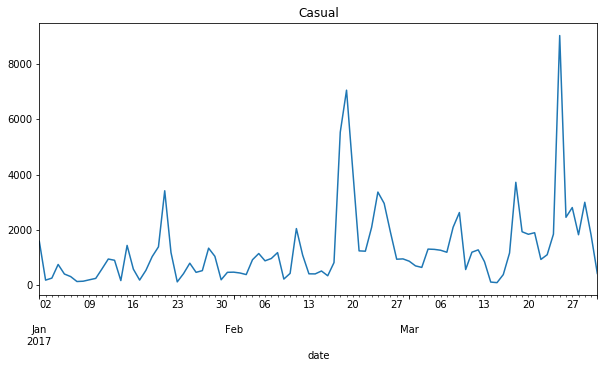

In [68]:
#%matplotlib inline
plt.figure(figsize=(10,5))

date_count['Casual'].plot(title='Casual')


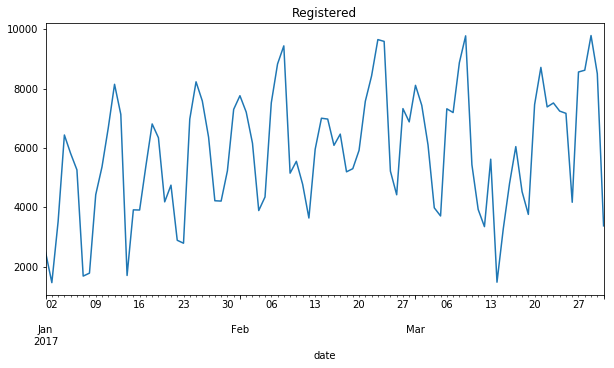

In [69]:
plt.figure(figsize=(10,5))

date_count['Registered'].plot(title='Registered')

In [70]:
# we can clearly see the pattern there is a spike in months of feb 15 to 20 and march 25 to 26 for casual riders
# for registered riders its almost constant but there seams to to a dip for few days in feb and march

In [72]:
by_week = date_count.groupby(date_count.index.dayofweek).mean()

In [73]:
by_week

Member Type,Casual,Registered
0,1106.384615,5653.076923
1,779.538462,6526.153846
2,1001.615385,7553.923077
3,965.076923,7233.076923
4,979.538462,6069.461538
5,2644.166667,4251.500000
6,1809.769231,3688.538462


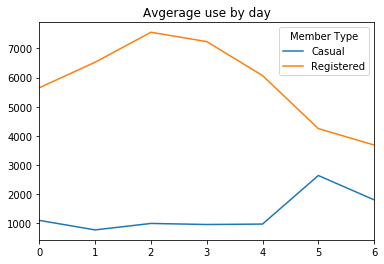

In [79]:
by_week.plot(title='Avgerage use by day')


In [80]:
# on saturdaya and sunday there are more casuales 

In [81]:
# lests see by hour

In [82]:
by_hour = data.pivot_table?

In [123]:
by_hour = data.pivot_table('index',aggfunc='count',index=['date','hour'],columns='Member Type').reset_index('hour')

In [124]:
#by_hour

In [125]:
by_hour['Weekend'] = (by_hour.index.dayofweek>5)

In [120]:
by_hour['weekday'] = by_hour.index.dayofweek<=5

In [126]:
by_hour.head()

Member Type,hour,Casual,Registered,Weekend
date,,,,
2017-01-01,0,23.0,54.0,True
2017-01-01,1,16.0,64.0,True
2017-01-01,2,5.0,57.0,True
2017-01-01,3,3.0,15.0,True
2017-01-01,4,NaN,5.0,True


In [127]:
week_hour = by_hour.groupby(['Weekend','hour']).mean()

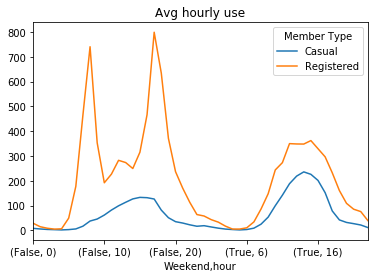

In [135]:
week_hour.plot(title ='Avg hourly use')

In [205]:
duration = data

In [140]:
duration['Duration'] = duration['Duration']/60

In [147]:
gop = duration.groupby("Member Type")

In [154]:
gop['Duration'].hist?

Member Type
Casual        AxesSubplot(0.125,0.125;0.775x0.755)
Registered    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Duration, dtype: object

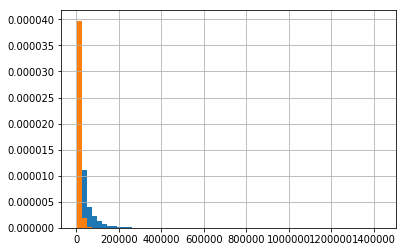

In [158]:

gop['Duration'].hist(bins=60,normed=True)

In [4]:
from bs4 import BeautifulSoup

In [5]:
import requests


In [6]:
url = 'https://feeds.capitalbikeshare.com/stations/stations.xml'

In [7]:
data = requests.get(url)

In [8]:
soup = BeautifulSoup(data.text,'lxml')

In [76]:
trip_location = []
for i in soup.find_all('terminalname'):
    trip_location.append(i.text)

In [63]:
x = []
y=[]
for i in soup.find_all('lat'):
    x.append(i.text)
for p in soup.find_all('long'):
    y.append(p.text)


In [68]:
location = pd.DataFrame({'x':x,'y':y})

In [71]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 2 columns):
x    485 non-null object
y    485 non-null object
dtypes: object(2)
memory usage: 7.7+ KB


In [74]:
location['x'] = location['x'].astype('float')

In [75]:
location['y'] = location['y'].astype('float')

In [77]:
location['trip_number'] = trip_location

In [83]:
location['z'] = list(zip(location['x'],location['y']))

In [80]:
location['trip_number'] = location['trip_number'].astype('int')

In [16]:
# merge the data sets

In [17]:
data = data.merge?

In [89]:
data3 = data.merge(location,how='',left_on='Start station number',right_on='trip_number')

In [126]:
l = data3.isnull

In [106]:
data3 = data.merge(location,how='left',left_on ='End station number',right_on ='trip_number')

In [107]:
data3.isnull().sum()

Duration                0
Start date              0
End date                0
Start station number    0
Start station           0
End station number      0
End station             0
Bike number             0
Member Type             0
x                       9
y                       9
trip_number             9
z                       9
dtype: int64

In [117]:
data3.index[data3.isnull().all(axis=0)]

C:\Users\amogh\Anaconda3\lib\site-packages\pandas\indexes\base.py:1434: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 646508 but corresponding boolean dimension is 13
  result = getitem(key)


Int64Index([], dtype='int64')

In [144]:
data3[pd.isnull(data3['z'])]

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,x,y,trip_number,z
52284,843482,2017-03-26 13:37:00,2017-03-26 13:51:00,32208,Tysons West Transit Center,32202,Solutions & Greensboro Dr,W21340,Registered,NaN,NaN,NaN,NaN
170938,546314,2017-03-09 23:50:00,2017-03-09 23:59:00,32203,Tysons One Pl & Chain Bridge Rd,32202,Solutions & Greensboro Dr,W21355,Casual,NaN,NaN,NaN,NaN
284894,1699258,2017-02-24 12:03:00,2017-02-24 12:31:00,32202,Solutions & Greensboro Dr,32202,Solutions & Greensboro Dr,W23103,Casual,NaN,NaN,NaN,NaN
435492,143213,2017-02-06 13:37:00,2017-02-06 13:40:00,32221,Greensboro & International Dr,32202,Solutions & Greensboro Dr,W23053,Registered,NaN,NaN,NaN,NaN
467806,117515,2017-02-01 14:34:00,2017-02-01 14:36:00,32221,Greensboro & International Dr,32202,Solutions & Greensboro Dr,W23046,Registered,NaN,NaN,NaN,NaN
504939,179690,2017-01-26 17:40:00,2017-01-26 17:43:00,32202,Solutions & Greensboro Dr,32202,Solutions & Greensboro Dr,W23174,Registered,NaN,NaN,NaN,NaN
531479,125455,2017-01-22 14:03:00,2017-01-22 14:05:00,32221,Greensboro & International Dr,32202,Solutions & Greensboro Dr,W23103,Registered,NaN,NaN,NaN,NaN
559665,170599,2017-01-18 12:10:00,2017-01-18 12:13:00,32201,Westpark Dr & Leesburg Pike,32202,Solutions & Greensboro Dr,W23007,Registered,NaN,NaN,NaN,NaN
595419,618172,2017-01-12 08:22:00,2017-01-12 08:33:00,32205,Westpark & Jones Branch Dr,32202,Solutions & Greensboro Dr,W23040,Casual,NaN,NaN,NaN,NaN


In [155]:
data3.dropna(how='all',inplace=True)

In [158]:
data3.drop(['x','y','trip_number'],inplace=True,axis=1)

In [159]:
data3.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,z
0,1048876,2017-03-31 23:59:00,2017-04-01 00:17:00,31213,17th & K St NW,31606,Potomac & Pennsylvania Ave SE,W20784,Registered,"(38.8803, -76.9862)"
1,223449,2017-03-31 23:59:00,2017-04-01 00:03:00,31104,Adams Mill & Columbia Rd NW,31103,16th & Harvard St NW,W20825,Registered,"(38.926088, -77.036536)"
2,423494,2017-03-31 23:58:00,2017-04-01 00:05:00,31627,M St & Delaware Ave NE,31614,11th & H St NE,W20773,Registered,"(38.899983, -76.991383)"
3,687015,2017-03-31 23:57:00,2017-04-01 00:08:00,31404,9th & Upshur St NW,31281,8th & O St NW,W01307,Registered,"(38.90864, -77.02277)"
4,257919,2017-03-31 23:57:00,2017-04-01 00:02:00,31602,Park Rd & Holmead Pl NW,31400,Georgia & New Hampshire Ave NW,W21760,Registered,"(38.936043, -77.024649)"


In [167]:
from geopy.distance import distance

In [164]:
for w in data3.columns:
    if w != 'z':
        print(w)
    else:
        'Start station number'

Duration
Start date
End date
Start station number
Start station
End station number
End station
Bike number
Member Type


In [174]:
data3['distance'] = data3.apply(lambda row: distance(row['Start station number'],row['End station number']).miles,axis=1)

In [182]:
data_dist_ca = data3[data3['Member Type'] == 'Casual']['distance']

In [183]:
data_dist_re = data3[data3['Member Type'] == 'Registered']['distance']

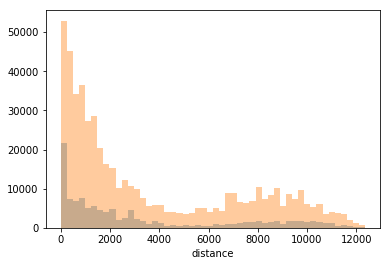

In [196]:
sns.distplot(data_dist_ca,kde=False)
sns.distplot(data_dist_re,kde=False)

In [194]:
sns.distplot

In [ ]:
# speed 
#D = S * t

In [215]:
dist_speed_cas = (data_dist_ca*60*60)/p

In [212]:
p = data3[data3['Member Type'] == 'Casual']['Duration']

In [214]:
l = data3[data3['Member Type'] == 'Registered']['Duration']

In [217]:
dist_speed = (data_dist_re*60*60)/l

Text(0,0.5,'speed')

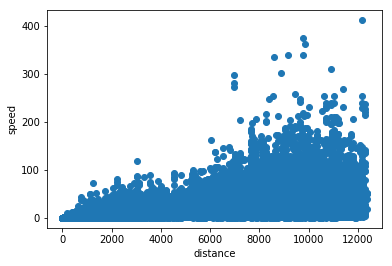

In [244]:
#plt.figure(figsize=(10,5))
plt.scatter(data_dist_ca,dist_speed_cas)
plt.xlabel('distance')
plt.ylabel('speed')
#sns.distplot(dist_speed,kde=False)

Text(0,0.5,'speed')

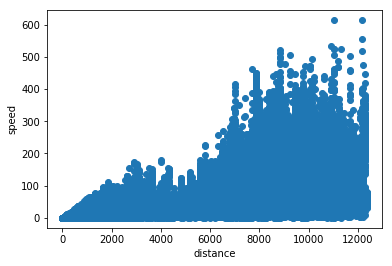

In [248]:
plt.scatter(data_dist_re,dist_speed)
plt.xlabel('distance')
plt.ylabel('speed')


In [302]:
len(data['Start station'].unique())

452

In [303]:
len(data['Bike number'].unique())

4298

In [304]:
len(data['Start station number'].unique())

452

In [7]:
data.head(2)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type
0,1048876,2017-03-31 23:59:00,2017-04-01 00:17:00,31213,17th & K St NW,31606,Potomac & Pennsylvania Ave SE,W20784,Registered
1,223449,2017-03-31 23:59:00,2017-04-01 00:03:00,31104,Adams Mill & Columbia Rd NW,31103,16th & Harvard St NW,W20825,Registered


In [8]:
from sklearn.preprocessing import Normalizer

In [9]:
N = Normalizer()

In [27]:
data.columns

Index(['Duration', 'Start date', 'End date', 'Start station number',
       'Start station', 'End station number', 'End station', 'Bike number',
       'Member Type', 'start_hour', 'start_minutes', 'start_sec', 'end_hour',
       'end_minutes', 'end_sec', 'day_week', 'day_week_end'],
      dtype='object')

In [ ]:
#features =['Duration', 'Start date', 'End date', 'Start station number',
      # , 'End station number', 'Bike number']

In [13]:
date_start = pd.DatetimeIndex(data['Start date'])

In [14]:
date_end = pd.DatetimeIndex(data['End date'])

In [15]:
data['start_hour'] = date_start.hour

In [16]:
data['start_minutes'] = date_start.minute

In [19]:
data['start_sec'] = date_start.second

In [21]:
data['end_hour'] = date_end.hour

In [22]:
data['end_minutes'] = date_end.minute

In [23]:
data['end_sec'] = date_end.second

In [24]:
data['day_week']= date_start.dayofweek

In [25]:
data['day_week_end'] = date_end.dayofweek

In [26]:
data.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start_hour,start_minutes,start_sec,end_hour,end_minutes,end_sec,day_week,day_week_end
0,1048876,2017-03-31 23:59:00,2017-04-01 00:17:00,31213,17th & K St NW,31606,Potomac & Pennsylvania Ave SE,W20784,Registered,23,59,0,0,17,0,4,5
1,223449,2017-03-31 23:59:00,2017-04-01 00:03:00,31104,Adams Mill & Columbia Rd NW,31103,16th & Harvard St NW,W20825,Registered,23,59,0,0,3,0,4,5
2,423494,2017-03-31 23:58:00,2017-04-01 00:05:00,31627,M St & Delaware Ave NE,31614,11th & H St NE,W20773,Registered,23,58,0,0,5,0,4,5
3,687015,2017-03-31 23:57:00,2017-04-01 00:08:00,31404,9th & Upshur St NW,31281,8th & O St NW,W01307,Registered,23,57,0,0,8,0,4,5
4,257919,2017-03-31 23:57:00,2017-04-01 00:02:00,31602,Park Rd & Holmead Pl NW,31400,Georgia & New Hampshire Ave NW,W21760,Registered,23,57,0,0,2,0,4,5


In [28]:
features = ['Duration', 'Start station number',
        'End station number', 'Bike number',
       'start_hour', 'start_minutes', 'start_sec', 'end_hour',
       'end_minutes', 'end_sec', 'day_week', 'day_week_end']

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
L = LabelEncoder()

In [34]:
data['Bike number'] = L.fit_transform(data['Bike number'])

In [35]:
data[features] = N.fit_transform(data[features])

In [36]:
data['Member Type'] = L.fit_transform(data['Member Type'])

In [39]:
from sklearn.cross_validation import train_test_split

In [41]:
X_train,X_test,Y_train,Y_test = train_test_split(data[features],data['Member Type'],test_size=0.3)

In [37]:

from sklearn.tree import DecisionTreeClassifier

In [38]:
classifier = DecisionTreeClassifier()

In [42]:
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [67]:
Y_pred = classifier.predict(X_test)

In [45]:
importance = classifier.feature_importances_

In [46]:
indices = np.argsort(importance)[::-1]

In [60]:
for i in range(X_train.shape[1]):
    print('{}.....{}'.format(features[indices[i]],importance[indices[i]]))

End station number.....0.38931576335517226
Start station number.....0.12357450921047611
Bike number.....0.11590044536543766
start_minutes.....0.07549585701734648
end_minutes.....0.07379888858994553
Duration.....0.06548081294389893
end_hour.....0.05406235480807373
start_hour.....0.05276142728592311
day_week.....0.03648481399987699
day_week_end.....0.013125127423849246
end_sec.....0.0
start_sec.....0.0


In [62]:
from sklearn.metrics import confusion_matrix

In [69]:
con=confusion_matrix(Y_test,y_pred=Y_pred)

In [70]:
con

array([[ 18339,  17209],
       [ 18935, 139470]], dtype=int64)

In [73]:
con.diagonal().sum()

157809

In [74]:
18935+17209

36144

In [75]:
157809/(157809+36144)

0.8136455739277041